In [1]:
# Import python library 
import pandas  as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
churn_data =  pd.read_csv(r"C:\Users\ashis\Downloads\Bank Customer Churn Prediction.csv")  

In [5]:
churn_data## Dataframe

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
churn_data.shape ## checking the shape of data 

(10000, 12)

In [7]:
churn_data.info() ## The 'info' function gives a short description of the data."

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


1. The 'info' function shows the dtype of the dataset and displays null values.

2. In the dataset, only two columns are "categorical," two are "float," and eight columns are of "integer" type.

In [8]:
churn_data.describe(include='all') ##The 'describe' function shows statistical information about the data.

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.569094e+07,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [9]:
churn_data.duplicated() ## checking duplicatess value

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [10]:
churn_data.nunique() ##Checking the unique values in each column of a dataset.

customer_id         10000
credit_score          460
country                 3
gender                  2
age                    70
tenure                 11
balance              6382
products_number         4
credit_card             2
active_member           2
estimated_salary     9999
churn                   2
dtype: int64

In [11]:
max_score = churn_data['credit_score']>720 ## Fetching information about customers whose credit score is greater than 720


In [12]:
max_score.value_counts()

credit_score
False    7592
True     2408
Name: count, dtype: int64

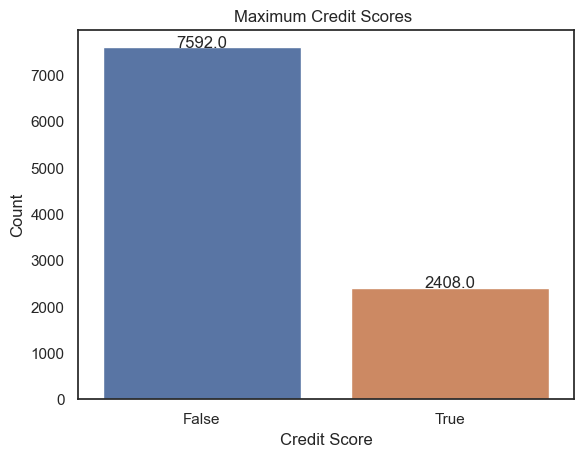

In [13]:
sns.set(style="white") 
ax= sns.countplot(x= max_score) # countplot
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')
plt.title('Maximum Credit Scores ')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

#This graph clearly indicates that 2408 customers have a good credit score, while another 7592 have a low credit score, meaning less than 720


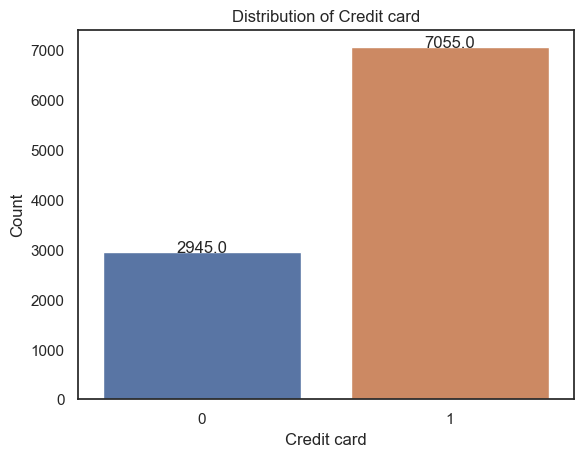

In [14]:
# No of people who have credit card
ax= sns.countplot(x= 'credit_card' ,data= churn_data)
for p in ax.patches:
     ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width()/2., p.get_height()),ha = 'center' ,va =  'baseline')
plt.title('Distribution of Credit card')
plt.xlabel('Credit card')
plt.ylabel('Count')
plt.show()
plt.show()

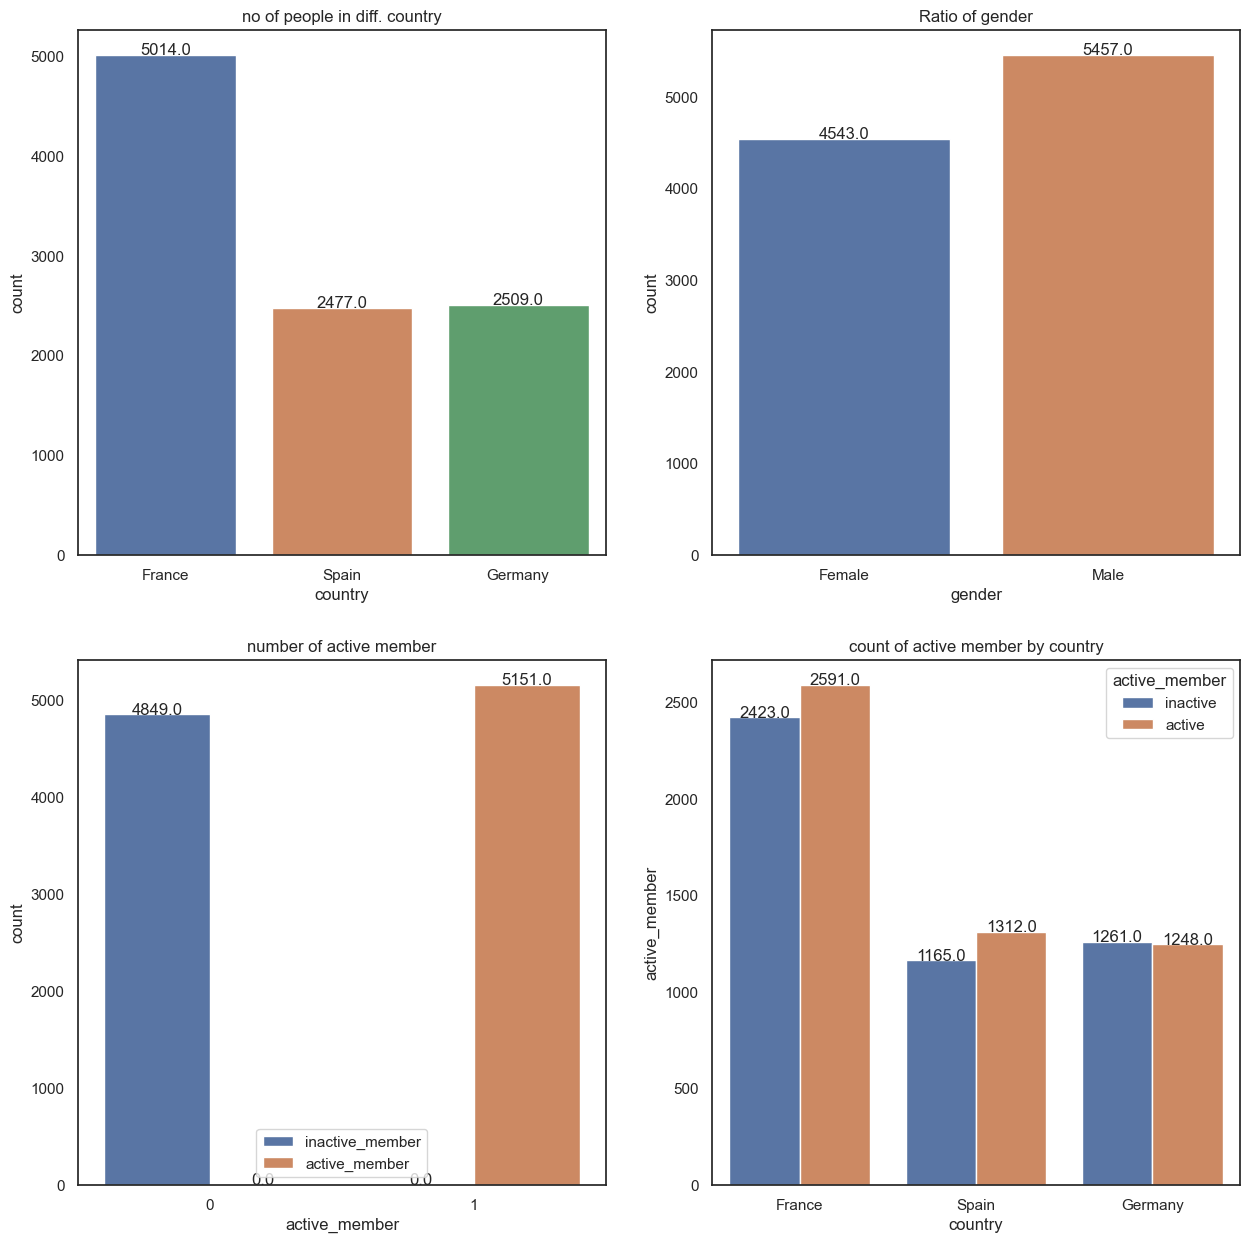

In [15]:
plt.figure(figsize=(15,15))

plt.subplot(2,2,1)
ax = sns.countplot(x= "country",data= churn_data)
plt.title("no of people in diff. country")
for p in ax.patches:
     ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width()/2., p.get_height()),ha = 'center' ,va =  'baseline')

plt.subplot(2,2,2)
ax= sns.countplot(x= 'gender',data= churn_data)
plt.title("Ratio of gender")
for p in ax.patches:
     ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width()/2., p.get_height()),ha = 'center' ,va =  'baseline')

plt.subplot(2,2,3)
ax =  sns.countplot(x= 'active_member',data= churn_data,hue= 'active_member')
plt.legend(['inactive_member','active_member'])
plt.title('number of active member')
for p in ax.patches:
     ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width()/2., p.get_height()),ha = 'center' ,va =  'baseline')
     
plt.subplot(2,2,4)
ax= sns.countplot(x='country',hue = 'active_member',data= churn_data)
plt.xlabel('country')
plt.ylabel('active_member')
plt.title('count of active member by country')
plt.legend(title = 'active_member',labels =['inactive','active'])
for p in ax.patches:
     ax.annotate(f'{p.get_height()}',(p.get_x() + p.get_width()/2., p.get_height()),ha = 'center' ,va =  'baseline')

plt.show()

In [16]:
# Assuming 'churn_data' is your DataFrame
df = churn_data[['country', 'gender']]

# Initialize LabelEncoder
encoder = LabelEncoder()

# Create a copy of the DataFrame
encoder_data = df.copy()

# Apply LabelEncoder to each column
for column in df.columns:
    encoder_data[column] = encoder.fit_transform(df[column])

# Now, 'encoder_data' contains the encoded columns
print(encoder_data)


      country  gender
0           0       0
1           2       0
2           0       0
3           0       0
4           2       0
...       ...     ...
9995        0       1
9996        0       1
9997        0       0
9998        1       1
9999        0       0

[10000 rows x 2 columns]


In [17]:
churn_data[['country','gender']]= encoder_data ## Assign encoded value to  dataframe.

In [18]:
churn_data  # New dataset 

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [19]:

churn_data = churn_data.drop(columns='customer_id',axis=1) # Drop Customer id column/feature 

In [20]:
churn_data

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [21]:
rel =  churn_data.corr() ## Examine the relationship between features
rel

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
credit_score,1.000000,0.007888,-0.002857,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
country,0.007888,1.000000,0.004719,0.022812,0.003739,0.069408,0.003972,-0.008523,0.006724,-0.001369,0.035943
gender,-0.002857,0.004719,1.000000,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512
age,-0.003965,0.022812,-0.027544,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
tenure,0.000842,0.003739,0.014733,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
balance,0.006268,0.069408,0.012087,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
products_number,0.012238,0.003972,-0.021859,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
credit_card,-0.005458,-0.008523,0.005766,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
active_member,0.025651,0.006724,0.022544,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
estimated_salary,-0.001384,-0.001369,-0.008112,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


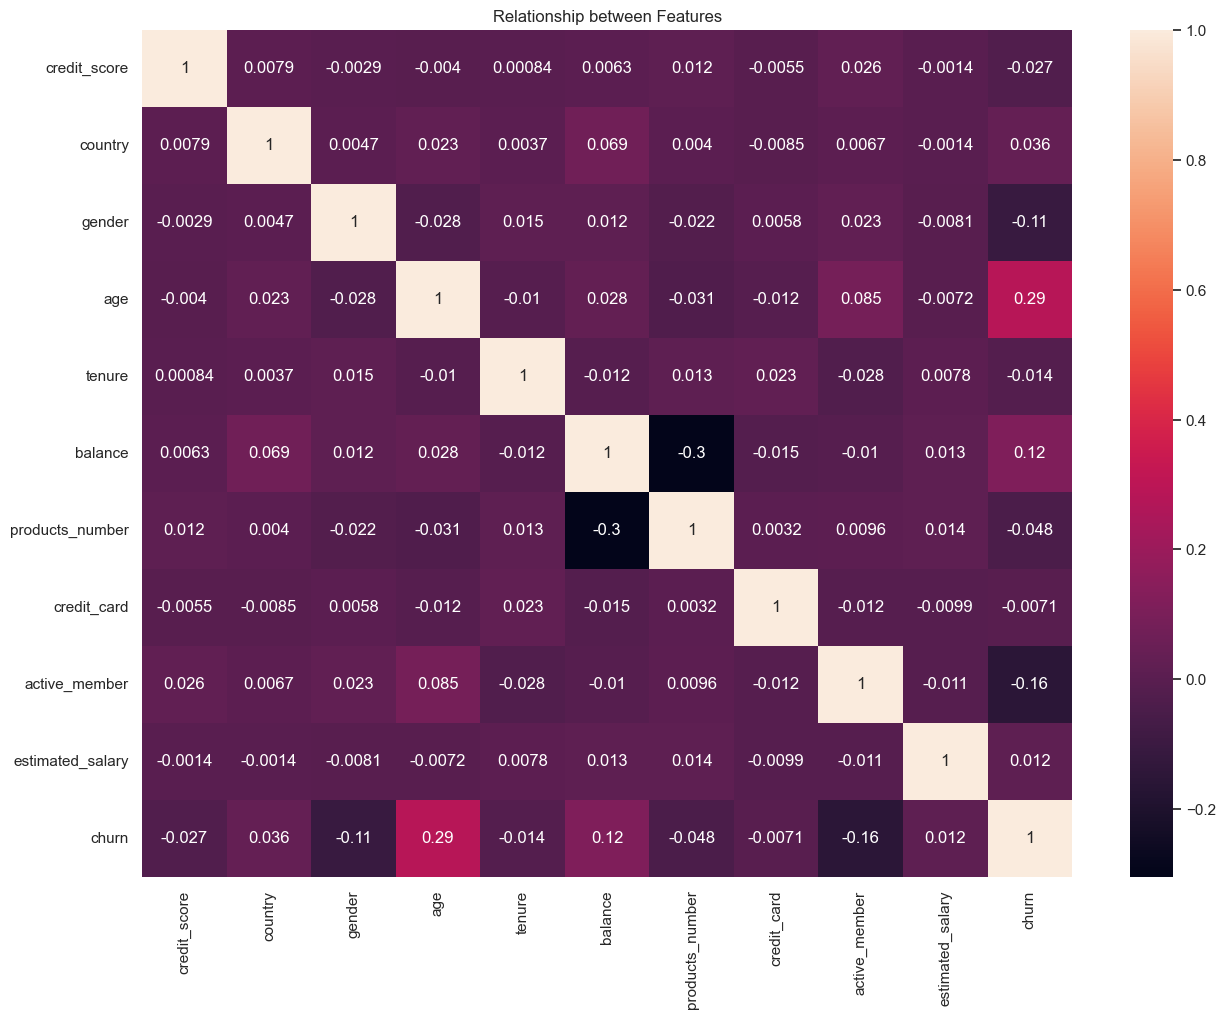

In [23]:
# Heatmap
plt.figure(figsize= (15,11))
sns.heatmap(rel,annot=True)
plt.title('Relationship between Features')
plt.show()

1. Here, you can see on the heatmap that all the features don't have a significant correlation with the target feature. This suggests that the features may not provide much useful information for predicting the target

In [24]:
x=  churn_data.iloc[:,0:-1]  # Independent features
y = churn_data.iloc[:,-1] # Target Feature


In [ ]:
# Train-Test model
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test =  train_test_split(x,y,test_size=0.2,random_state=50)
print(x_train.shape)

In [94]:
# Feature scaling
from sklearn.preprocessing import StandardScaler  ##  Applied the Standard Scaler method.
scaler =  StandardScaler()
X_train = scaler.fit_transform(x_train) ## Fit transform data
X_test  =  scaler.transform(x_test)



In [64]:
churn_data.columns

Index(['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn'],
      dtype='object')

In [83]:
## Create a new dataset with standardized scaling values
churn_dataa =  pd.DataFrame(X_train,columns=['credit_score', 'country', 'gender', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary'])

In [84]:
churn_dataa

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
0,0.150452,1.515878,0.907049,-0.081970,1.378711,-1.221063,-0.911285,-1.552905,0.970680,-0.229753
1,-0.976278,-0.903719,0.907049,0.109409,-0.005798,0.797446,-0.911285,0.643954,0.970680,-0.095601
2,-0.872909,-0.903719,-1.102476,0.300789,0.340329,-1.221063,-0.911285,0.643954,-1.030206,1.393117
3,0.109104,1.515878,-1.102476,-1.038868,0.686457,0.307649,-0.911285,-1.552905,-1.030206,0.029177
4,-0.325049,-0.903719,-1.102476,0.874928,-0.351925,-1.221063,-0.911285,-1.552905,-1.030206,-1.435612
...,...,...,...,...,...,...,...,...,...,...
7995,1.483922,1.515878,-1.102476,-1.613007,-0.351925,0.613572,-0.911285,0.643954,0.970680,0.124089
7996,-1.017626,1.515878,0.907049,0.587858,1.378711,-1.221063,0.802462,0.643954,-1.030206,-1.285003
7997,-0.986615,1.515878,0.907049,-0.656109,-0.351925,-1.221063,0.802462,0.643954,0.970680,-0.803945
7998,1.029095,1.515878,-1.102476,0.013720,0.686457,0.695744,-0.911285,0.643954,-1.030206,-0.235755


In [86]:
churn_dataa.describe() # Describe function show stastical description of data.

,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary
count,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03,8.000000e+03
mean,1.314504e-16,6.239453e-17,8.881784e-19,-1.105782e-16,-3.907985e-17,-4.796163e-17,1.243450e-16,-6.572520e-17,8.881784e-19,-1.039169e-16
std,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00,1.000063e+00
min,-3.105696e+00,-9.037195e-01,-1.102476e+00,-1.995766e+00,-1.736433e+00,-1.221063e+00,-9.112847e-01,-1.552905e+00,-1.030206e+00,-1.750192e+00
25%,-6.971801e-01,-9.037195e-01,-1.102476e+00,-6.561091e-01,-6.980518e-01,-1.221063e+00,-9.112847e-01,-1.552905e+00,-1.030206e+00,-8.538513e-01
50%,5.734439e-03,-9.037195e-01,9.070494e-01,-1.776601e-01,-5.797629e-03,3.329004e-01,-9.112847e-01,6.439544e-01,9.706797e-01,6.942658e-03
75%,6.983120e-01,3.060790e-01,9.070494e-01,4.921686e-01,1.032584e+00,8.250752e-01,8.024618e-01,6.439544e-01,9.706797e-01,8.535672e-01
max,2.062793e+00,1.515878e+00,9.070494e-01,5.085279e+00,1.724838e+00,2.801180e+00,4.229955e+00,6.439544e-01,9.706797e-01,1.728694e+00


In [87]:
## Import Deep learning library.

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [112]:
## Sequential model
Ann_model  =  Sequential([
     keras.layers.Dense(15,input_shape= (10,),activation = 'relu'), ## First hidden layer and activation function relu 
     keras.layers.Dense(10,activation = 'relu'), ## Second hidden layer
     keras.layers.Dense(9,activation = 'relu'), ## Third hidden layer
     
     keras.layers.Dense(1,activation = 'sigmoid') ## Output layer using 1 neuron and Activation function sigmoid
])

In [114]:
# Model compile
Ann_model.compile(
     optimizer = 'adam', ## Adam otimizer
     loss = 'BinaryCrossentropy',   ## Loss function
     metrics =  ['accuracy']        
)
model_history = Ann_model.fit(X_train,y_train,epochs=50)  

Epoch 1/50
250/250 [==============================] - 1s 2ms/step - loss: 0.5018 - accuracy: 0.7974
Epoch 2/50
250/250 [==============================] - 0s 2ms/step - loss: 0.4177 - accuracy: 0.8095
Epoch 3/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3870 - accuracy: 0.8290
Epoch 4/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3715 - accuracy: 0.8447
Epoch 5/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3624 - accuracy: 0.8510
Epoch 6/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3569 - accuracy: 0.8520
Epoch 7/50
250/250 [==============================] - 0s 2ms/step - loss: 0.3529 - accuracy: 0.8556
Epoch 8/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3503 - accuracy: 0.8575
Epoch 9/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3484 - accuracy: 0.8574
Epoch 10/50
250/250 [==============================] - 0s 1ms/step - loss: 0.3463 - accuracy: 0.8584

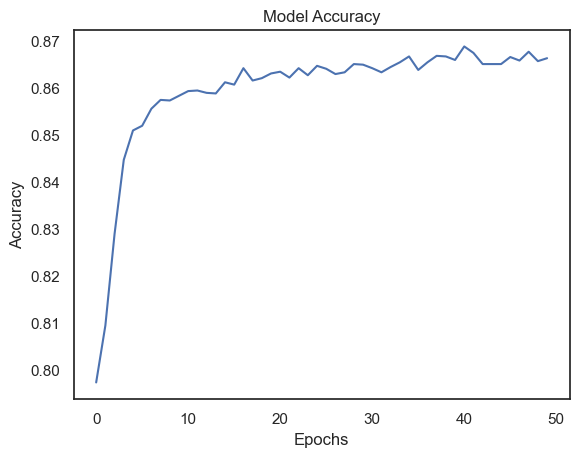

In [115]:

## Model Accuracy plot
plt.plot(model_history.history['accuracy'])  # Plots the accuracy values from the model's history
plt.title('Model Accuracy')  # Sets the title of the plot
plt.ylabel('Accuracy')  # Sets the label for the y-axis
plt.xlabel('Epochs')  # Sets the label for the x-axis
plt.show()  # Displays the plot


In [116]:
Ann_model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3528 - accuracy: 0.8560


[0.3527791500091553, 0.8560000061988831]

In [117]:
yp  =  Ann_model.predict(X_test)
yp

63/63 [==============================] - 0s 1ms/step


array([[0.05512824],
       [0.69554454],
       [0.18757465],
       ...,
       [0.01970065],
       [0.03521343],
       [0.56881243]], dtype=float32)

In [118]:
y_pred = [] ## empty list
for i in yp:
     if i > 0.5: ## threshold  value 0.5
          y_pred.append(1)  ## value greater then 0.5 append 1.
     else:
          y_pred.append(0)## value lesser then 0.5 append 0.

In [103]:
print(len(y_pred),len(y_test))

2000 2000


In [119]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(y_test,y_pred)   ## Confusion matrix
cm

array([[1500,   64],
       [ 224,  212]], dtype=int64)

- 500: True negatives (TN)
- 64: False positives (FP)
- 224: False negatives (FN)
- 212: True positives (TP)

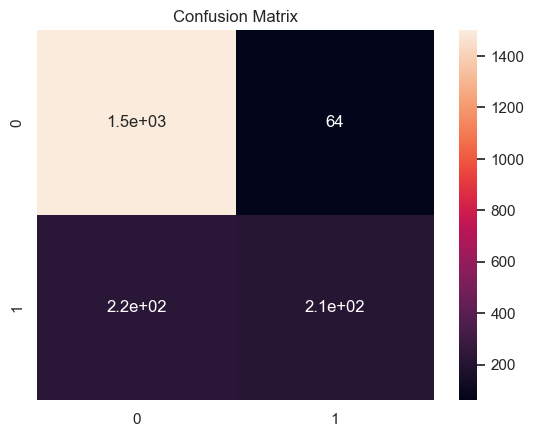

In [120]:
## Confusion matrix plot .
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix')
plt.show()

In [121]:
report =  classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1564
           1       0.77      0.49      0.60       436

    accuracy                           0.86      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.85      0.86      0.84      2000



- Precision: Indicates the accuracy of the positive predictions. In this context:

  Precision for class 0: 0.87 (87%)
  Precision for class 1: 0.77 (77%)
- Recall (Sensitivity or True Positive Rate): Measures the ability of the model to capture all the relevant instances. In this context:

  Recall for class 0: 0.96 (96%)
  Recall for class 1: 0.49 (49%)
- F1-score: The harmonic mean of precision and recall. It provides a balance between precision and recall. In this context:

  F1-score for class 0: 0.91 (91%)
  F1-score for class 1: 0.60 (60%)

In [122]:
churn_dataa_np =  churn_dataa.values
churn_dataa_np[0].reshape(1,-1)

array([[ 0.15045213,  1.51587752,  0.90704943, -0.08197028,  1.37871072,
        -1.22106306, -0.91128471, -1.55290497,  0.97067965, -0.22975334]])

In [123]:
# predicting Model Accuracy .
Ann_model.predict(churn_dataa_np[0].reshape(1,-1))


1/1 [==============================] - 0s 23ms/step


array([[0.0959162]], dtype=float32)

In [ ]:
## Save the model on my local system using TensorFlow.
model_version = 1
Ann_model.save(f"../model/{model_version}")